In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Baca data teks setelah preprocessing

In [ ]:
#data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_PREPROCESSING_INDIHOME_PANDEMI(BARU).csv')
#data

### Baca data label

In [3]:
label=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_PREPROCESSING_INDIHOME_SEBELUM_PANDEMI_FINAL(BALANCING).csv')
label

,Tweet_bersih,Label
0,abdoellathif benar kak maksimal jarak penarika...,1
1,abdoellathif benar kak maksimal jarak penarika...,1
2,achyararfan baik kak selamat menikmati layanan...,1
3,achyararfan baik kak selamat menikmati layanan...,1
4,ada apa dengan kualitas sinyal kartu halo telk...,0
...,...,...
1995,zenggobalikpapa jangkauan sinyal wireless rout...,1
1996,ziahfauz yeay senang mendengar kabar baiknya k...,1
1997,ziauladli yeay senang mendengar kabar baiknya ...,1
1998,ziauladli yeay senang mendengar kabar baiknya ...,1


### Ganti data teks di label menjadi data hasil preprocessing


In [ ]:
#label['Tweet_bersih']=data['Tweet_bersih']
#label

In [ ]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet_bersih  2000 non-null   object
 1   Label         2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Casting tipe data text menjadi string

In [5]:
label['Tweet_bersih']=label['Tweet_bersih'].astype(str)
label

,Tweet_bersih,Label
0,abdoellathif benar kak maksimal jarak penarika...,1
1,abdoellathif benar kak maksimal jarak penarika...,1
2,achyararfan baik kak selamat menikmati layanan...,1
3,achyararfan baik kak selamat menikmati layanan...,1
4,ada apa dengan kualitas sinyal kartu halo telk...,0
...,...,...
1995,zenggobalikpapa jangkauan sinyal wireless rout...,1
1996,ziahfauz yeay senang mendengar kabar baiknya k...,1
1997,ziauladli yeay senang mendengar kabar baiknya ...,1
1998,ziauladli yeay senang mendengar kabar baiknya ...,1


In [6]:
label['Tokenizing']=label['Tweet_bersih'].apply(lambda x:x.split())
label

,Tweet_bersih,Label,Tokenizing
0,abdoellathif benar kak maksimal jarak penarika...,1,"[abdoellathif, benar, kak, maksimal, jarak, pe..."
1,abdoellathif benar kak maksimal jarak penarika...,1,"[abdoellathif, benar, kak, maksimal, jarak, pe..."
2,achyararfan baik kak selamat menikmati layanan...,1,"[achyararfan, baik, kak, selamat, menikmati, l..."
3,achyararfan baik kak selamat menikmati layanan...,1,"[achyararfan, baik, kak, selamat, menikmati, l..."
4,ada apa dengan kualitas sinyal kartu halo telk...,0,"[ada, apa, dengan, kualitas, sinyal, kartu, ha..."
...,...,...,...
1995,zenggobalikpapa jangkauan sinyal wireless rout...,1,"[zenggobalikpapa, jangkauan, sinyal, wireless,..."
1996,ziahfauz yeay senang mendengar kabar baiknya k...,1,"[ziahfauz, yeay, senang, mendengar, kabar, bai..."
1997,ziauladli yeay senang mendengar kabar baiknya ...,1,"[ziauladli, yeay, senang, mendengar, kabar, ba..."
1998,ziauladli yeay senang mendengar kabar baiknya ...,1,"[ziauladli, yeay, senang, mendengar, kabar, ba..."


**Fasttext**

In [ ]:
#!pip install gensim keras

In [7]:
from gensim.models import Word2Vec
# Train Word2Vec model
word2vec_model = Word2Vec(label['Tokenizing'])
word2vec_model.save("word2vec_model.bin")

In [8]:
from gensim.models import FastText
# Train Fasttext model
fasttext_model = FastText(label['Tokenizing'],vector_size=100)
fasttext_model.save("fasttext_model.bin")

In [9]:
word2vec_model = Word2Vec.load("word2vec_model.bin")
fasttext_model = FastText.load("fasttext_model.bin")

In [10]:
word = "wifi"
word_embedding = word2vec_model.wv[word]
print(f"Word2Vec embedding for '{word}': {word_embedding}")

# Step 6: Get word embeddings using FastText
word = "sinyal"
word_embedding = fasttext_model.wv[word]
print(f"FastText embedding for '{word}': {word_embedding}")

Word2Vec embedding for 'wifi': [ 5.9317243e-01 -3.9681632e-02  1.4138728e-02 -6.7119539e-01
 -2.4336685e-01 -7.7056426e-01  5.5120939e-01  1.4043819e+00
 -2.6779878e-01 -2.1048936e-01 -1.4621652e-04 -5.8136827e-01
  9.9124080e-03  1.8822810e-01 -1.1907362e-02  3.1878811e-01
  2.2453965e-01  1.4645150e-03  2.2947977e-01 -6.9855320e-01
  3.4027033e-02  4.7599930e-01 -3.5051984e-01  2.2082156e-02
  1.4152712e-01 -2.7484161e-01 -4.3748489e-01  2.2655407e-01
 -2.4194105e-01 -6.9234863e-02  2.9620575e-02 -4.7971797e-01
  4.2132345e-01 -4.4915190e-01 -8.8686961e-01  4.2934746e-01
  6.6391140e-01 -5.0304513e-02  2.8217534e-02  2.8045070e-01
  4.2681824e-02 -3.3463153e-01  4.9439795e-02  6.3797659e-01
  2.5889847e-01  5.2852076e-01 -2.7997071e-01 -3.6447663e-02
  4.3068048e-01  2.7615640e-01 -4.5873180e-01 -5.8563548e-01
  4.1337636e-01 -4.9321029e-01  2.5059256e-01 -1.3153099e-01
  2.3975626e-01 -2.7113101e-01  3.4038571e-01  4.9173182e-01
 -1.4350259e-01 -3.8319993e-01  5.5030257e-01  2.94729

### Fasttext

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
max_len=35
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(label['Tweet_bersih'])

In [13]:
len(tokenizer.word_index)

3534

In [14]:
sequences=tokenizer.texts_to_sequences(label['Tweet_bersih'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)

In [15]:
labels= tf.keras.utils.to_categorical(label['Label'], num_classes=2)
labels.shape

(2000, 2)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,labels,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600, 35), (400, 35), (1600, 2), (400, 2))

In [17]:
# Convert FastText word embeddings to an embedding matrix
embedding_dim = fasttext_model.vector_size

embedding_matrix = np.zeros((len(tokenizer.word_index)+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv.key_to_index:
        embedding_vector = fasttext_model.wv[word]
        embedding_matrix[i] = embedding_vector

In [18]:
from keras import optimizers
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1,embedding_dim,weights=[embedding_matrix],input_length=max_len),
    tf.keras.layers.Conv1D(filters=128,kernel_size=4, padding='same',activation='relu'),
    tf.keras.layers.MaxPool1D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Conv1D(filters=64,kernel_size=2, padding='same',activation='tanh'),
    tf.keras.layers.MaxPool1D(2,2),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),

    tf.keras.layers.Dense(2,activation='softmax')
])
adam = optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 100)           353500    
                                                                 
 conv1d (Conv1D)             (None, 35, 128)           51328     
                                                                 
 max_pooling1d (MaxPooling1  (None, 17, 128)           0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 17, 128)           512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 17, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            1

In [19]:
r=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 7s 31ms/step - loss: 0.7288 - accuracy: 0.5195 - val_loss: 0.6915 - val_accuracy: 0.5562
Epoch 2/10
40/40 [==============================] - 1s 23ms/step - loss: 0.6822 - accuracy: 0.5680 - val_loss: 0.6966 - val_accuracy: 0.4688
Epoch 3/10
40/40 [==============================] - 1s 23ms/step - loss: 0.6551 - accuracy: 0.5898 - val_loss: 0.6996 - val_accuracy: 0.4844
Epoch 4/10
40/40 [==============================] - 1s 23ms/step - loss: 0.6254 - accuracy: 0.6133 - val_loss: 0.6906 - val_accuracy: 0.5344
Epoch 5/10
40/40 [==============================] - 1s 22ms/step - loss: 0.6098 - accuracy: 0.6375 - val_loss: 0.6716 - val_accuracy: 0.5844
Epoch 6/10
40/40 [==============================] - 1s 22ms/step - loss: 0.5945 - accuracy: 0.6695 - val_loss: 0.6461 - val_accuracy: 0.6000
Epoch 7/10
40/40 [==============================] - 1s 28ms/step - loss: 0.5805 - accuracy: 0.6500 - val_loss: 0.6216 - val_accuracy: 0.6250
Epoch 8/10
40

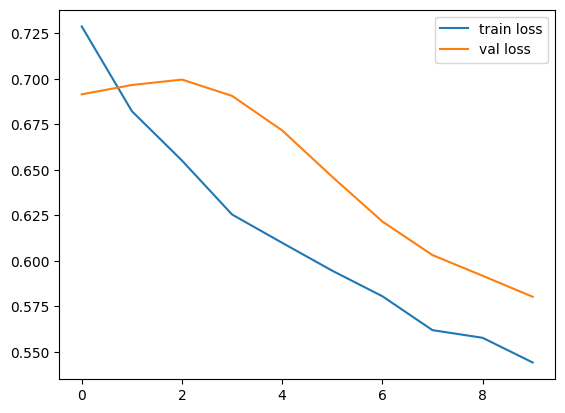

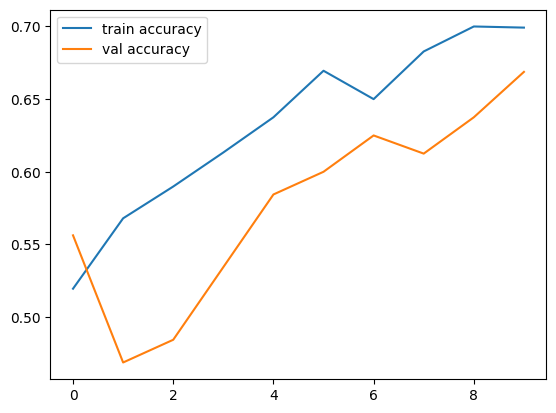

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

model.fit(x_train, y_train)

predicted = model.predict(x_test)
predicted_labels = (predicted > 0.5).astype(int)
print("CNN Accuracy:", accuracy_score(y_test, predicted_labels))

print("CNN Precision: ", precision_score(y_test, predicted_labels, average='weighted', pos_label="NEGATIF" ))

print("CNN Recall:", recall_score(y_test, predicted_labels, average='weighted', pos_label="NEGATIF"))
print("CNN f1_score:", f1_score(y_test, predicted_labels, average='weighted', pos_label="NEGATIF"))

print (f'confusion matrix:\n {multilabel_confusion_matrix(y_test, predicted_labels)}')
print('=-------\n')

print(classification_report(y_test, predicted_labels, zero_division=0))

13/13 [==============================] - 0s 10ms/step
CNN Accuracy: 0.73
CNN Precision:  0.7298538961038961
CNN Recall: 0.73
CNN f1_score: 0.7292650468797257
confusion matrix:
 [[[128  60]
  [ 48 164]]

 [[164  48]
  [ 60 128]]]
=-------

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       212
           1       0.73      0.68      0.70       188

   micro avg       0.73      0.73      0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400
 samples avg       0.73      0.73      0.73       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'NEGATIF') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'NEGATIF') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'NEGATIF') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 1s 13ms/step - loss: 0.6952 - accuracy: 0.5100


[0.695247232913971, 0.5099999904632568]